In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
from preprocess_dataset import standardised_X, dummy_Y

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [3]:
from keras.models import Sequential
from keras.layers import Dense

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
def create_baseline():
    # create the model
    model = Sequential()
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', activation='sigmoid'))
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [6]:
model = create_baseline()
history = model.fit(standardised_X, dummy_Y, validation_split = 0.1, epochs = 30)

Train on 18000 samples, validate on 2000 samples
Epoch 1/30
18000/18000 [==============================] - 1s 76us/step - loss: 0.9664 - acc: 0.7035 - val_loss: 0.5783 - val_acc: 0.9405
Epoch 2/30
18000/18000 [==============================] - 1s 45us/step - loss: 0.4636 - acc: 0.8079 - val_loss: 0.4264 - val_acc: 0.9405
Epoch 3/30
18000/18000 [==============================] - 1s 44us/step - loss: 0.4459 - acc: 0.8088 - val_loss: 0.4466 - val_acc: 0.9405
Epoch 4/30
18000/18000 [==============================] - 1s 43us/step - loss: 0.4414 - acc: 0.8089 - val_loss: 0.4256 - val_acc: 0.9405
Epoch 5/30
18000/18000 [==============================] - 1s 43us/step - loss: 0.4390 - acc: 0.8088 - val_loss: 0.4248 - val_acc: 0.9405
Epoch 6/30
18000/18000 [==============================] - 1s 43us/step - loss: 0.4370 - acc: 0.8085 - val_loss: 0.4209 - val_acc: 0.9405
Epoch 7/30
18000/18000 [==============================] - 1s 44us/step - loss: 0.4356 - acc: 0.8087 - val_loss: 0.4088 - val_acc:

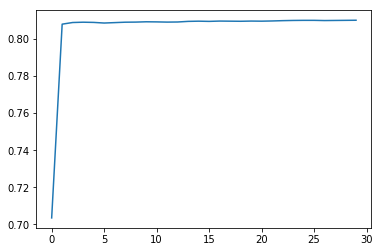

In [7]:
plt.plot(history.history['acc'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 160       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.get_weights()

[array([[-0.4120774 , -0.34548962,  0.25256655,  0.01094389,  0.00282417,
         -0.8034969 , -0.80030453,  0.5297624 ],
        [-0.00401707, -0.40335584, -0.2807822 ,  0.8668087 ,  1.2690176 ,
          0.99546415,  0.4737816 ,  1.3036251 ],
        [ 0.0187859 ,  0.09868985,  0.14598894,  0.16434388, -0.1354437 ,
         -0.07799997,  0.06041019, -0.12496068],
        [ 0.22843438, -0.15962571, -0.04542096,  0.11904928, -0.09665669,
          0.2867314 ,  0.1597194 ,  0.44046953],
        [ 0.6891423 , -0.7502923 , -0.938214  ,  0.33661023,  0.36249995,
          0.6088729 , -0.31656796,  0.6565163 ],
        [-0.7044944 ,  0.65151507,  0.08580383, -0.37964764, -0.49133044,
          0.28158695,  1.0950136 , -0.52783126],
        [-0.4409934 , -0.08646977,  0.36989975, -0.82974285, -1.4287221 ,
         -0.01300256, -0.60620934, -1.345386  ],
        [-0.8057867 ,  1.0278074 ,  0.40231603, -0.85937923, -0.53612703,
         -0.52295876, -0.35105026, -0.41528824],
        [ 0.0380

In [9]:
predict = model.predict(standardised_X, verbose=1)

20000/20000 [==============================] - 0s 13us/step


In [10]:
predict_new = np.zeros_like(predict)
predict_new[np.arange(len(predict)), predict.argmax(1)] = 1
print(predict_new)

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [11]:
count1 = [0]*5
count2=0

In [12]:
for prediction_new in predict_new:
    count2=count2+1
    if(prediction_new[0] == 1):
        count1[0]+=1
    elif(prediction_new[1] == 1):
        count1[1]+=1
    elif(prediction_new[2] == 1):
        count1[2]+=1
    elif(prediction_new[3] == 1):
        count1[3]+=1
    elif(prediction_new[4] == 1):
        count1[4]+=1

In [13]:
print(count1)
print(count2)

[3806, 7135, 4114, 1316, 3629]
20000


In [14]:
y_true = []
y_pred = []
count = 0

In [15]:
for true_vector in dummy_Y:
    count+=1
    if(true_vector[0] == 1):
        y_true.append('a')
    elif(true_vector[1] == 1):
        y_true.append('b')
    elif(true_vector[2] == 1):
        y_true.append('c')
    elif(true_vector[3] == 1):
        y_true.append('d')
    elif(true_vector[4] == 1):
        y_true.append('e')

In [16]:
for true_vector in predict_new:
    if(true_vector[0] == 1):
        y_pred.append('a')
    elif(true_vector[1] == 1):
        y_pred.append('b')
    elif(true_vector[2] == 1):
        y_pred.append('c')
    elif(true_vector[3] == 1):
        y_pred.append('d')
    elif(true_vector[4] == 1):
        y_pred.append('e')

In [17]:
print(count)
print(len(y_true))
print(len(y_pred))

20000
20000
20000


In [18]:
confusion_matrix(y_true, y_pred)

array([[3783,    0,  217,    0,    0],
       [   3, 3978,    2,   17,    0],
       [   0,  223, 3777,    0,    0],
       [  20, 2563,  118, 1299,    0],
       [   0,  371,    0,    0, 3629]])